In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import missingno as msno
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print(f'Total null values\n\n{df.isnull().sum()}')

Total null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
print(f'Total duplicated data: {df.duplicated().sum()}')

Total duplicated data: 0


In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Glucose, BloodPressure, SkinThickness, Insulin and BMI can not be 0. As we see these features's min values are 0. It is irrational.
corrupted_data = df.loc[:,'Glucose':'BMI']

In [10]:
corrupted_data.replace(0, np.nan, inplace=True)

In [11]:
df.loc[:,'Glucose':'BMI'] = corrupted_data

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

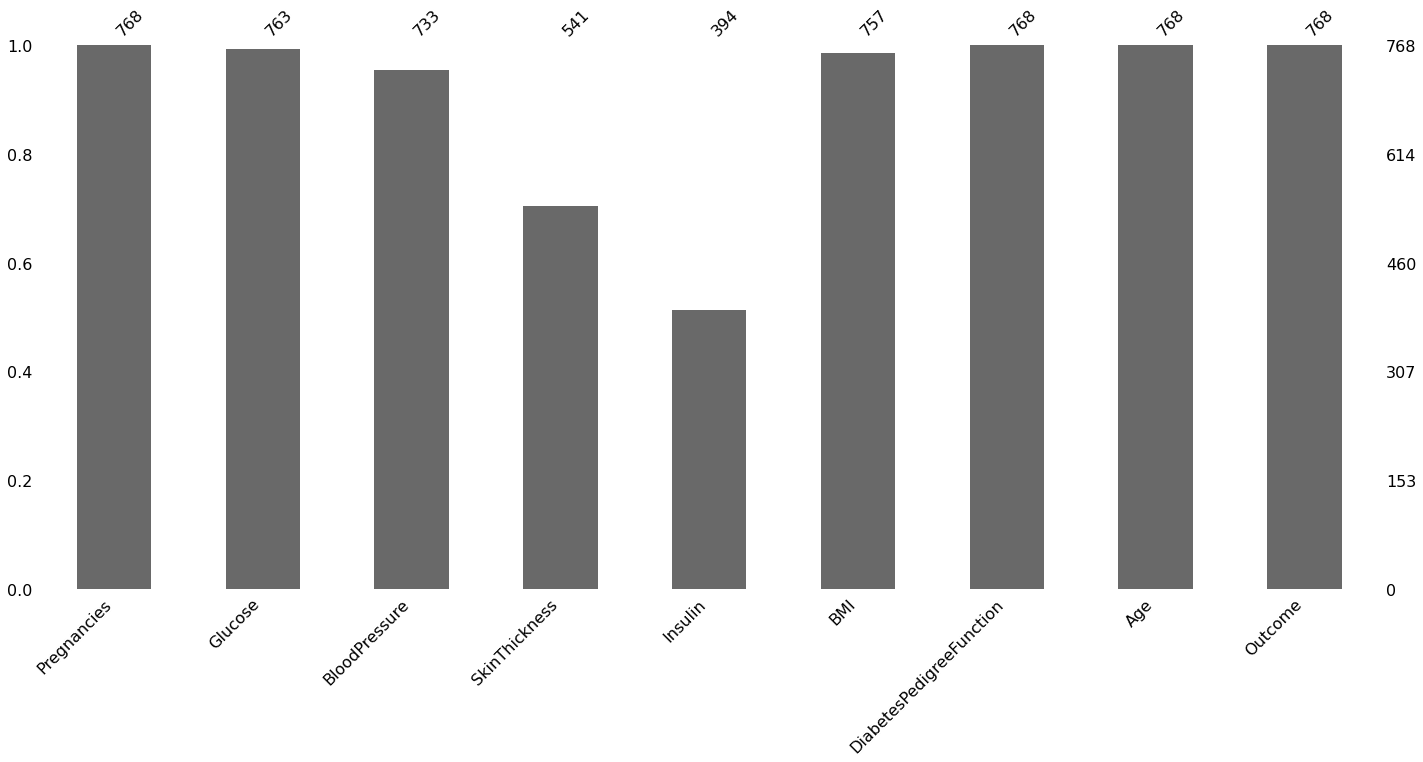

In [14]:
msno.bar(df)

<AxesSubplot:>

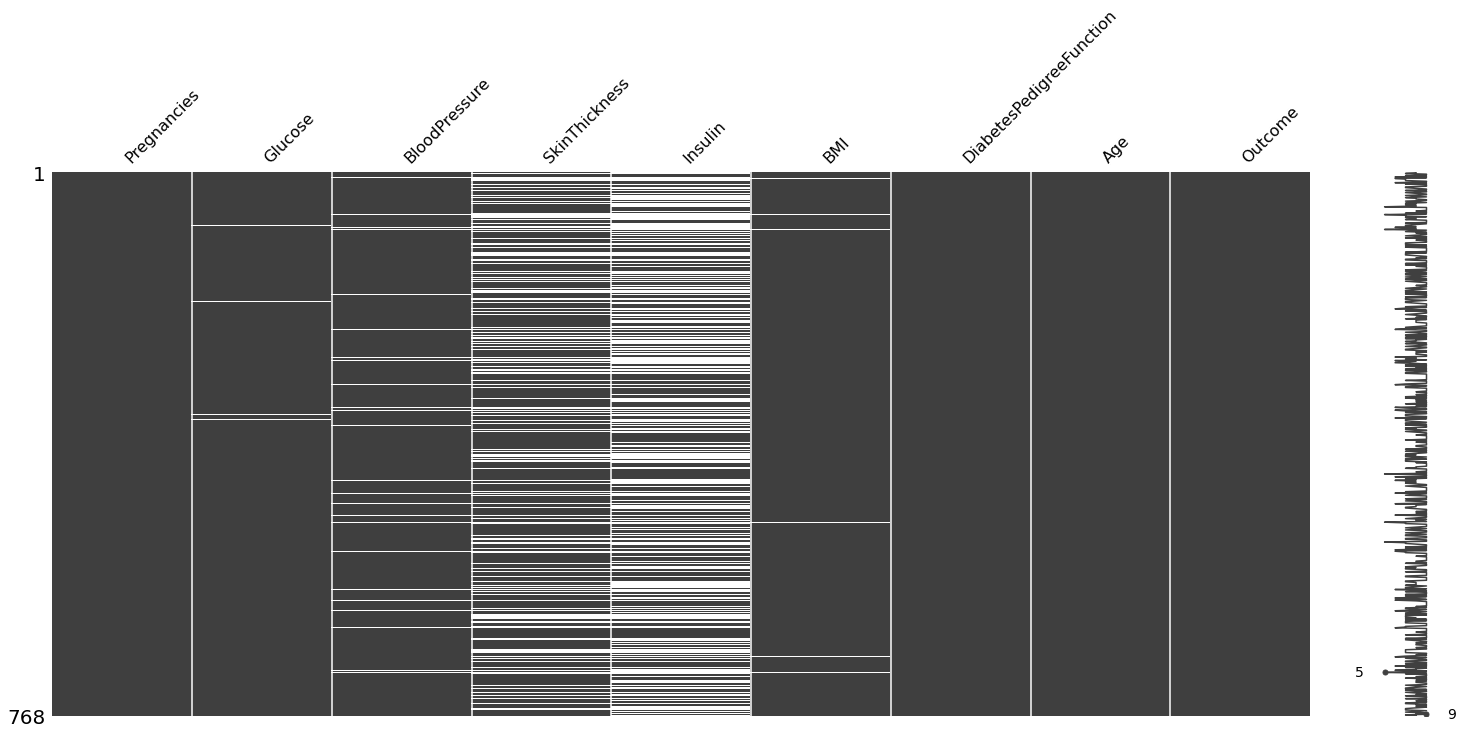

In [15]:
msno.matrix(df)

<AxesSubplot:>

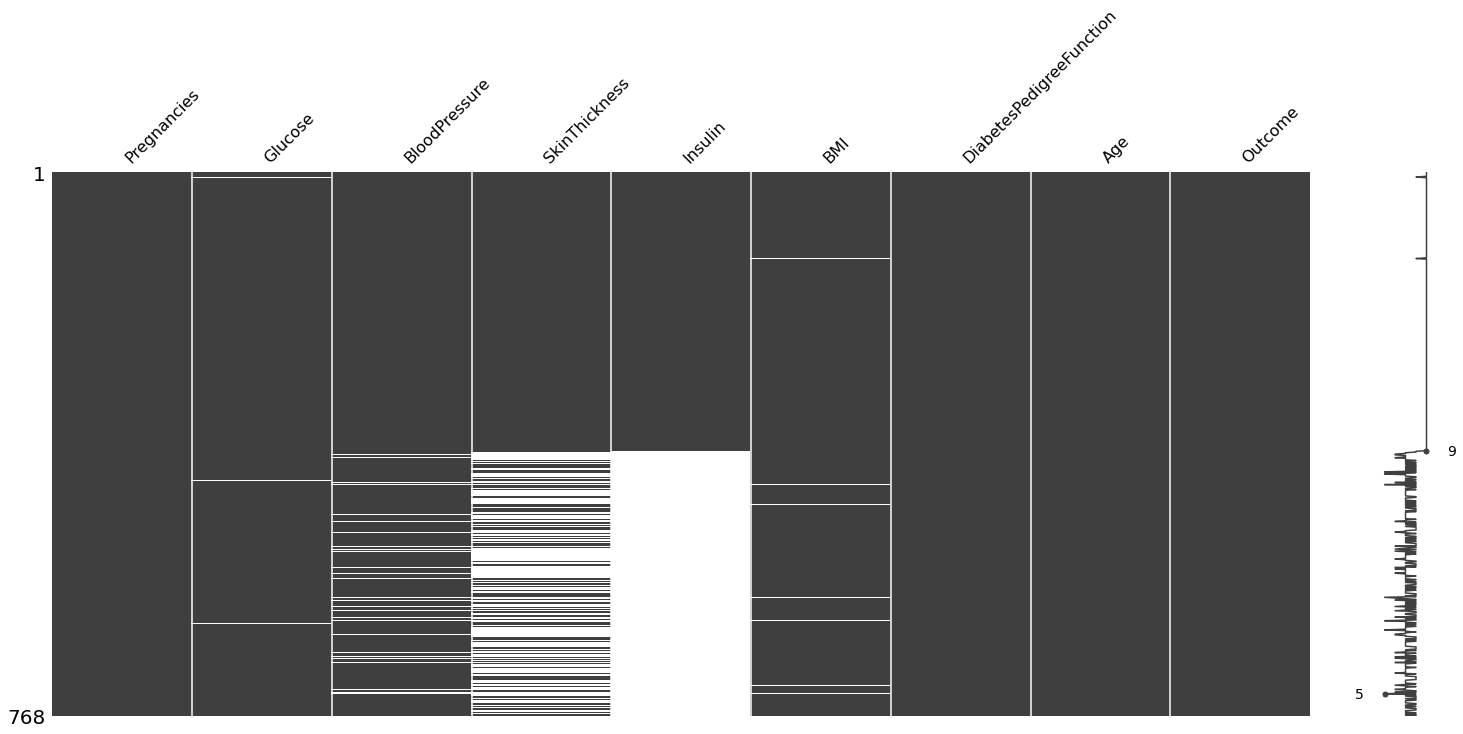

In [16]:
msno.matrix(df.sort_values(by='Insulin'))

<AxesSubplot:>

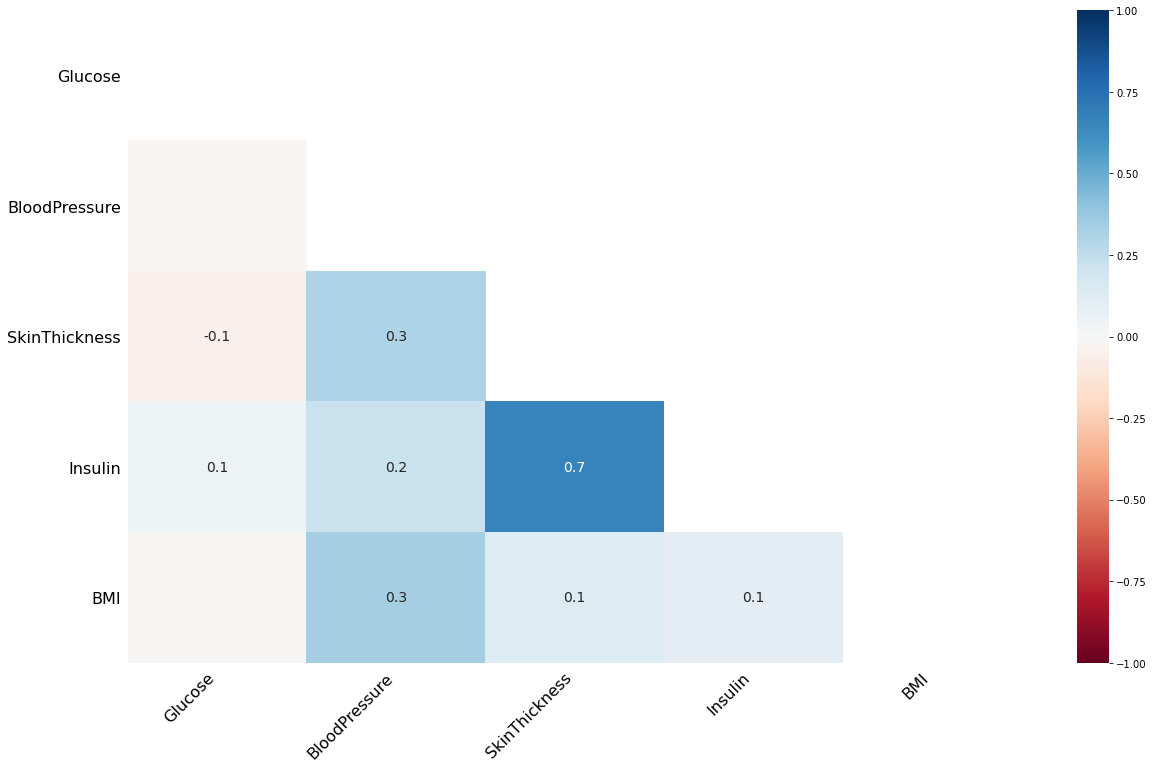

In [17]:
msno.heatmap(df)

In [18]:
df.dropna(subset=['Glucose','BMI'], inplace=True)

In [19]:
df_knn = df.copy()

In [20]:
df_knn.iloc[:,:] = KNNImputer().fit_transform(df_knn)

In [21]:
df_knn.shape

(752, 9)

In [22]:
df_knn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,72.413830,29.102128,154.656649,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,12.223965,9.473877,98.872359,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,90.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,135.000000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,34.650000,191.850000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
cleaned_data = df_knn.copy()

<AxesSubplot:xlabel='Pregnancies'>

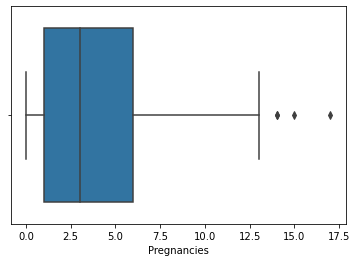

In [24]:
sns.boxplot(data=df_knn,x='Pregnancies')

In [25]:
cleaned_data = cleaned_data[cleaned_data['Pregnancies']<=13]

<AxesSubplot:xlabel='Glucose'>

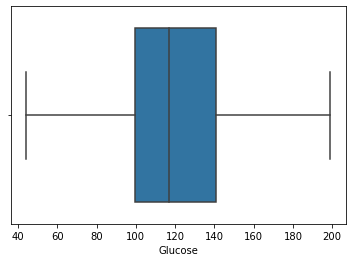

In [26]:
sns.boxplot(data=df_knn,x='Glucose')

<AxesSubplot:xlabel='BloodPressure'>

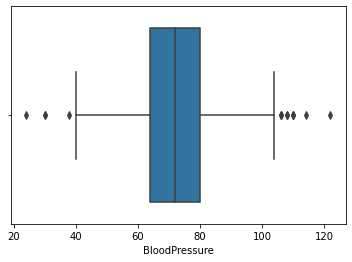

In [27]:
sns.boxplot(data=df_knn,x='BloodPressure')

In [28]:
cleaned_data = cleaned_data[cleaned_data['BloodPressure']>=30]

<AxesSubplot:xlabel='SkinThickness'>

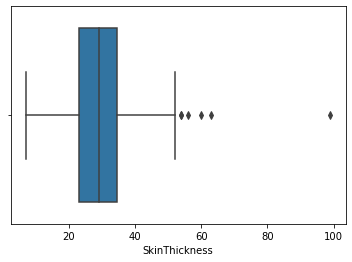

In [29]:
sns.boxplot(data=df_knn,x='SkinThickness')

In [30]:
cleaned_data = cleaned_data[cleaned_data['SkinThickness']<=70]

<AxesSubplot:xlabel='Insulin'>

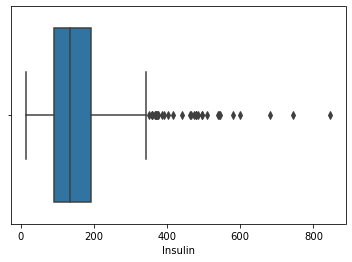

In [31]:
sns.boxplot(data=df_knn,x='Insulin')

In [32]:
cleaned_data = cleaned_data[cleaned_data['Insulin']<=750]

<AxesSubplot:xlabel='BMI'>

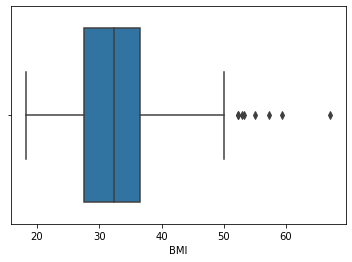

In [33]:
sns.boxplot(data=df_knn,x='BMI')

In [34]:
cleaned_data = cleaned_data[cleaned_data['BMI']<=60]

<AxesSubplot:xlabel='Age'>

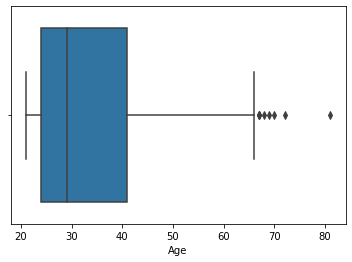

In [35]:
sns.boxplot(data=df_knn,x='Age')

In [36]:
cleaned_data = cleaned_data[cleaned_data['Age']<=70]

In [37]:
print("Removed", df_knn.shape[0]-cleaned_data.shape[0], "outliers.")

Removed 10 outliers.


<AxesSubplot:>

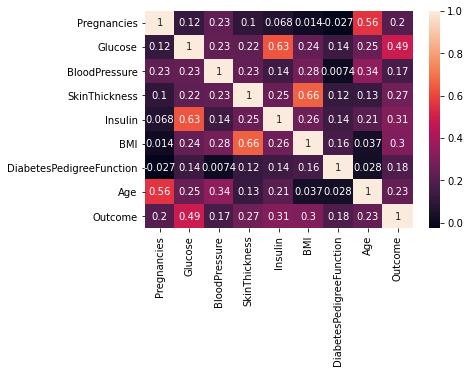

In [38]:
sns.heatmap(cleaned_data.corr(), annot=True)

<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

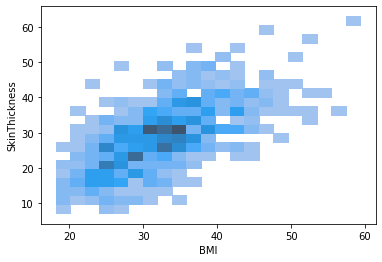

In [39]:
sns.histplot(data=cleaned_data, x='BMI',y='SkinThickness')

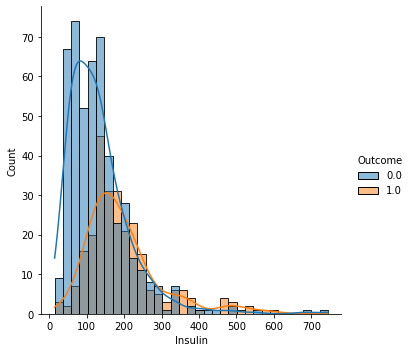

In [40]:
sns.displot(data=cleaned_data, x='Insulin', hue='Outcome', kde=True)

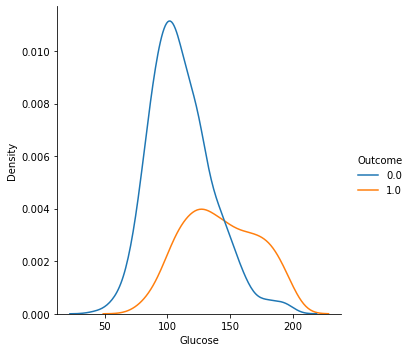

In [41]:
sns.displot(data=cleaned_data, x='Glucose', hue='Outcome', kind='kde')

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

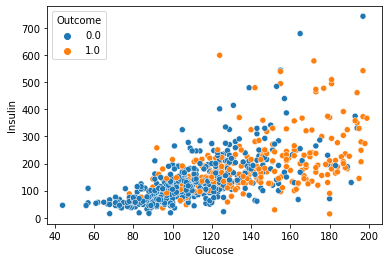

In [42]:
sns.scatterplot(data=cleaned_data, x='Glucose', y='Insulin', hue='Outcome')

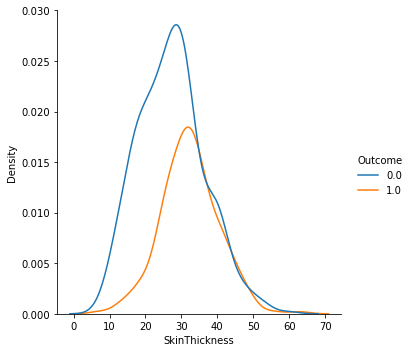

In [43]:
sns.displot(data=cleaned_data, x='SkinThickness', hue='Outcome', kind='kde')

In [44]:
cleaned_data['Outcome'].value_counts(normalize=True)

0.0    0.653639
1.0    0.346361
Name: Outcome, dtype: float64

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [46]:
X = cleaned_data.loc[:,'Pregnancies':'Age']
y = cleaned_data['Outcome']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=11)

In [48]:
model = LogisticRegression(random_state=11, max_iter=200)

In [49]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=11)

In [50]:
y_prediction = model.predict(X_test)

Text(0.5, 87.0, 'Truth')

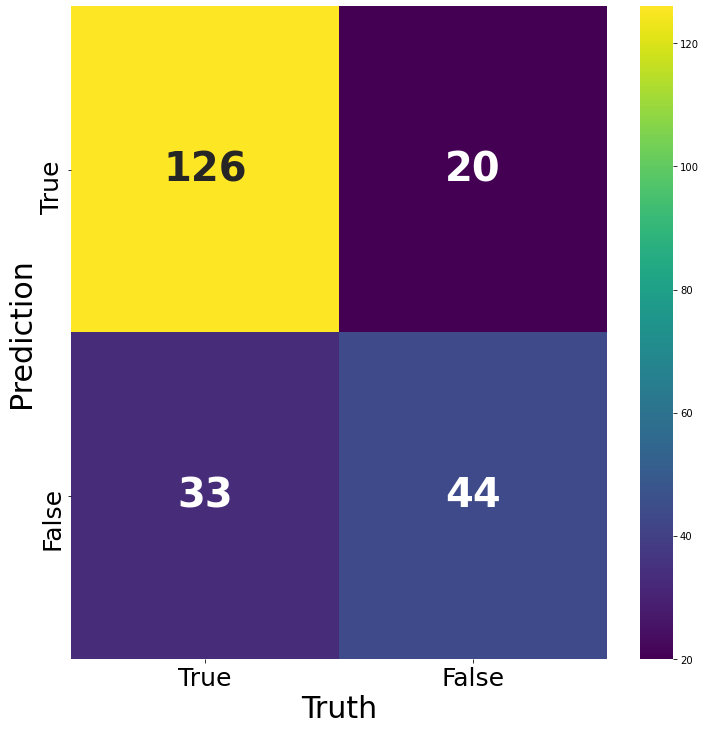

In [51]:
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})  
labels = ['True', 'False']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Truth', fontsize=30)

In [52]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83       146
         1.0       0.69      0.57      0.62        77

    accuracy                           0.76       223
   macro avg       0.74      0.72      0.73       223
weighted avg       0.76      0.76      0.76       223



In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y ,random_state=11)

In [57]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print("{} neigbors score: {}".format(3, knn.score(X_test,y_test)))

3 neigbors score: 0.6995515695067265


In [58]:
from sklearn.metrics import f1_score, recall_score

In [67]:
recall_scores = []
f1_scores = []
for n in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors=n)
    knn2.fit(X_train, y_train)
    
    y_prediction = knn2.predict(X_test) 
    recall_scores.append((n, round(recall_score(y_test, y_prediction), 4)))
    f1_scores.append((n, round(recall_score(y_test, y_prediction), 4)))

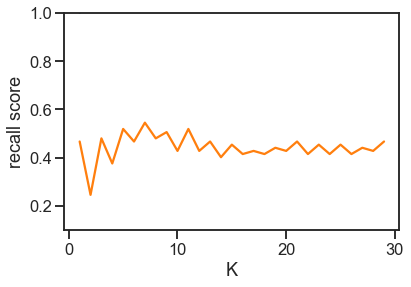

[(1, 0.4675), (2, 0.2468), (3, 0.4805), (4, 0.3766), (5, 0.5195), (6, 0.4675), (7, 0.5455), (8, 0.4805), (9, 0.5065), (10, 0.4286), (11, 0.5195), (12, 0.4286), (13, 0.4675), (14, 0.4026), (15, 0.4545), (16, 0.4156), (17, 0.4286), (18, 0.4156), (19, 0.4416), (20, 0.4286), (21, 0.4675), (22, 0.4156), (23, 0.4545), (24, 0.4156), (25, 0.4545), (26, 0.4156), (27, 0.4416), (28, 0.4286), (29, 0.4675)]


In [85]:
plt.plot(range(1,30),recall_scores)
plt.ylim(0.1,1)
plt.xlabel('K')
plt.ylabel('recall score'),
plt.show()
print(recall_scores)

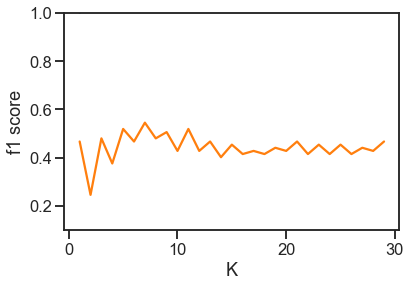

[(1, 0.4675), (2, 0.2468), (3, 0.4805), (4, 0.3766), (5, 0.5195), (6, 0.4675), (7, 0.5455), (8, 0.4805), (9, 0.5065), (10, 0.4286), (11, 0.5195), (12, 0.4286), (13, 0.4675), (14, 0.4026), (15, 0.4545), (16, 0.4156), (17, 0.4286), (18, 0.4156), (19, 0.4416), (20, 0.4286), (21, 0.4675), (22, 0.4156), (23, 0.4545), (24, 0.4156), (25, 0.4545), (26, 0.4156), (27, 0.4416), (28, 0.4286), (29, 0.4675)]


In [86]:
plt.plot(range(1,30),f1_scores)
plt.ylim(0.1,1)
plt.xlabel('K')
plt.ylabel('f1 score'),
plt.show()
print(f1_scores)

In [87]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print("{} neigbors score: {}".format(7, knn.score(X_test,y_test)))
print(classification_report(y_test, y_prediction))

7 neigbors score: 0.726457399103139
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.81       146
         1.0       0.67      0.47      0.55        77

    accuracy                           0.74       223
   macro avg       0.71      0.67      0.68       223
weighted avg       0.73      0.74      0.72       223

